<a href="https://colab.research.google.com/github/prateekrao/Terrahouse/blob/main/Ripe_Fruit_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pre-processing and Data Visualization**

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
from random import shuffle
from tensorflow.keras.utils import to_categorical
import pickle

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

In [ ]:
!unzip "/content/fruits-fresh-and-rotten-for-classification.zip" -d dataset

In [ ]:
def load_rand():
    X=[]
    dir_path='/content/dataset/dataset/train'
    for sub_dir in tqdm(os.listdir(dir_path)):
        print(sub_dir)
        path_main=os.path.join(dir_path,sub_dir)
        i=0
        for img_name in os.listdir(path_main):
            if i>=6:
                break
            img=cv2.imread(os.path.join(path_main,img_name))
            img=cv2.resize(img,(100,100))
            img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            X.append(img)
            i+=1
    return X
    

In [ ]:
X=load_rand()

100%|██████████| 6/6 [00:00<00:00, 30.58it/s]

rottenoranges
rottenbanana
freshbanana
freshapples
rottenapples
freshoranges


In [ ]:
X=np.array(X)
X.shape

(36, 100, 100, 3)

In [ ]:
def show_subpot(X,title=False,Y=None):
    if X.shape[0]==36:
        f, ax= plt.subplots(6,6, figsize=(40,60))
        list_fruits=['rottenoranges', 'rottenbanana', 'freshbanana', 'freshapple', 'rottenapple', 'freshoranges']
        for i,img in enumerate(X):
            ax[i//6][i%6].imshow(img, aspect='auto')
            if title==False:
                ax[i//6][i%6].set_title(list_fruits[i//6])
            elif title and Y is not None:
                ax[i//6][i%6].set_title(Y[i])
        plt.show()
    else:
        print('Cannot plot')

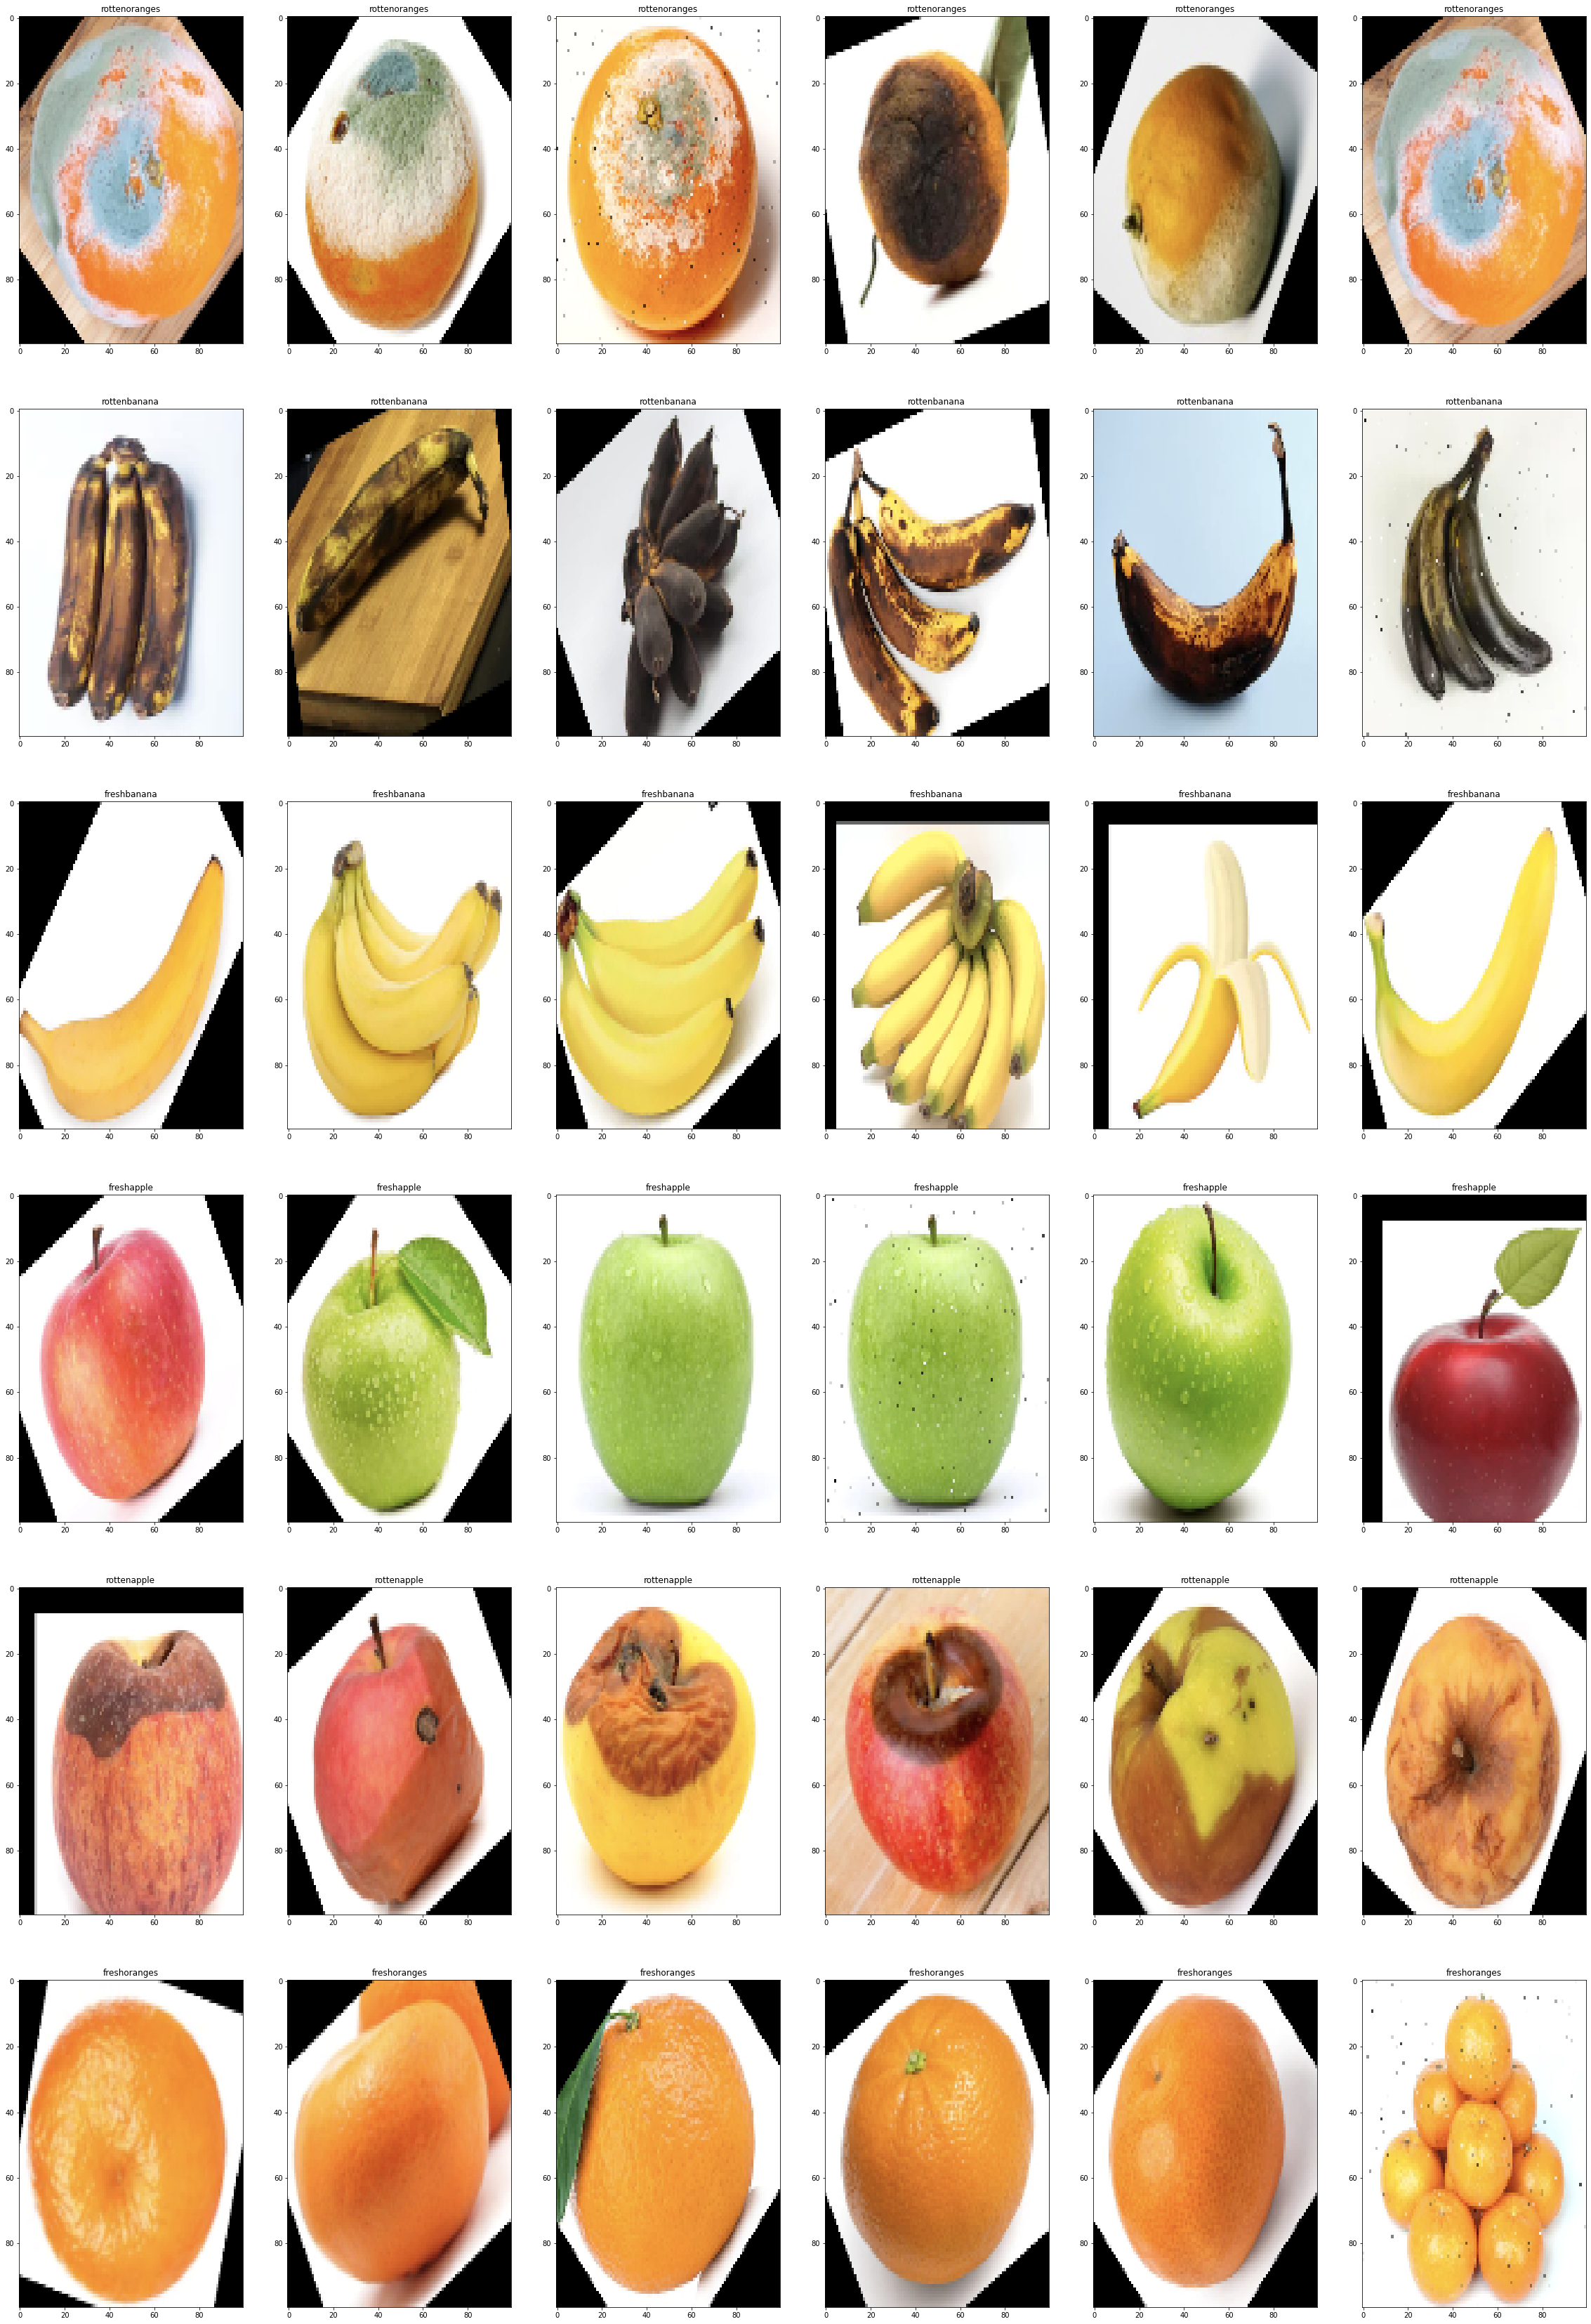

In [ ]:
show_subpot(X)

In [ ]:
del X

In [ ]:
def load_rottenvsfresh():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/content/dataset/dataset/train')):
        if quality[0] in cata:
            path_main=os.path.join('/content/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('/content/dataset/dataset/train',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y

In [ ]:
X,Y=load_rottenvsfresh()


100%|██████████| 6/6 [00:40<00:00,  6.77s/it]


Shuffling your data.....


100%|██████████| 10901/10901 [00:00<00:00, 777229.98it/s]


In [ ]:
Y=np.array(Y)
X=np.array(X)

In [ ]:
def load_rottenvsfresh_valset():
    quality=['fresh', 'rotten']
    X,Y=[],[]
    z=[]
    for cata in tqdm(os.listdir('/content/dataset/dataset/test')):
        if quality[0] in cata:
            path_main=os.path.join('/content/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,0])
        else:
            path_main=os.path.join('/content/dataset/dataset/test',cata)
            for img_name in os.listdir(path_main):
                img=cv2.imread(os.path.join(path_main,img_name))
                img=cv2.resize(img,(100,100))
                img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
                z.append([img,1])
    print('Shuffling your data.....')
    shuffle(z)
    for images, labels in tqdm(z):
        X.append(images);Y.append(labels)
    return X,Y            

In [ ]:
X_val,Y_val=load_rottenvsfresh_valset()


100%|██████████| 6/6 [00:09<00:00,  1.54s/it]


Shuffling your data.....


100%|██████████| 2698/2698 [00:00<00:00, 610039.47it/s]


In [ ]:
Y_val=np.array(Y_val)
X_val=np.array(X_val)
y_ser=pd.Series(Y_val)
y_ser.value_counts()

1    1534
0    1164
dtype: int64